# Berlin Trees Exploratory Analysis
This notebook loads the Berlin tree cadastre dataset (Straßenbäume Berlin) and performs exploratory data analysis.

**Important:** Download the dataset via WFS in the script 'load_tree_geojson.ipynb' and save it as a csv in a folder named 'data'. It is then loaded from the saved data in this script.

## Basic Information

In [ ]:
# Berlin Street Trees Exploratory Data Analysis
# Using GeoJSON from Berlin WFS service

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [12]:

# Load GeoJSON file (replace path if needed)
gdf = gpd.read_file('data/berlin_strassenbaeume.geojson')

# Inspect the first rows
print(gdf.head())

# Check coordinate reference system
print('CRS:', gdf.crs)


                                 id              gisid              pitid  \
0  strassenbaeume.00008100_000bbafb  00008100_000bbafb  00008100:000bbafb   
1  strassenbaeume.00008100_000bbafd  00008100_000bbafd  00008100:000bbafd   
2  strassenbaeume.00008100_000bbafe  00008100_000bbafe  00008100:000bbafe   
3  strassenbaeume.00008100_000bbaff  00008100_000bbaff  00008100:000bbaff   
4  strassenbaeume.00008100_000bbb00  00008100_000bbb00  00008100:000bbb00   

  standortnr kennzeich              namenr                art_dtsch  \
0         93     01414  Fritz-Reuter-Allee      Pyramiden-Hainbuche   
1         91     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
2         90     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
3         89     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   
4         88     01414  Fritz-Reuter-Allee  Berg-Ahorn, Weiss-Ahorn   

                         art_bot gattung_deutsch   gattung  ...      hausnr  \
0  Carpinus betulus 'Fastigiata

## Summary Statistics

In [13]:

# Convert to WGS84 if necessary
gdf = gdf.to_crs(epsg=4326)

# Basic info about dataset
print(gdf.info())
print(gdf.describe())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 434035 entries, 0 to 434034
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               434035 non-null  object  
 1   gisid            434035 non-null  object  
 2   pitid            431949 non-null  object  
 3   standortnr       431947 non-null  object  
 4   kennzeich        431949 non-null  object  
 5   namenr           431949 non-null  object  
 6   art_dtsch        431939 non-null  object  
 7   art_bot          431939 non-null  object  
 8   gattung_deutsch  422235 non-null  object  
 9   gattung          431939 non-null  object  
 10  art_gruppe       431939 non-null  object  
 11  strname          424270 non-null  object  
 12  hausnr           262392 non-null  object  
 13  zusatz           47671 non-null   object  
 14  pflanzjahr       431734 non-null  object  
 15  standalter       431767 non-null  float64 
 16  kronedurch  

## Distribution of Tree Species

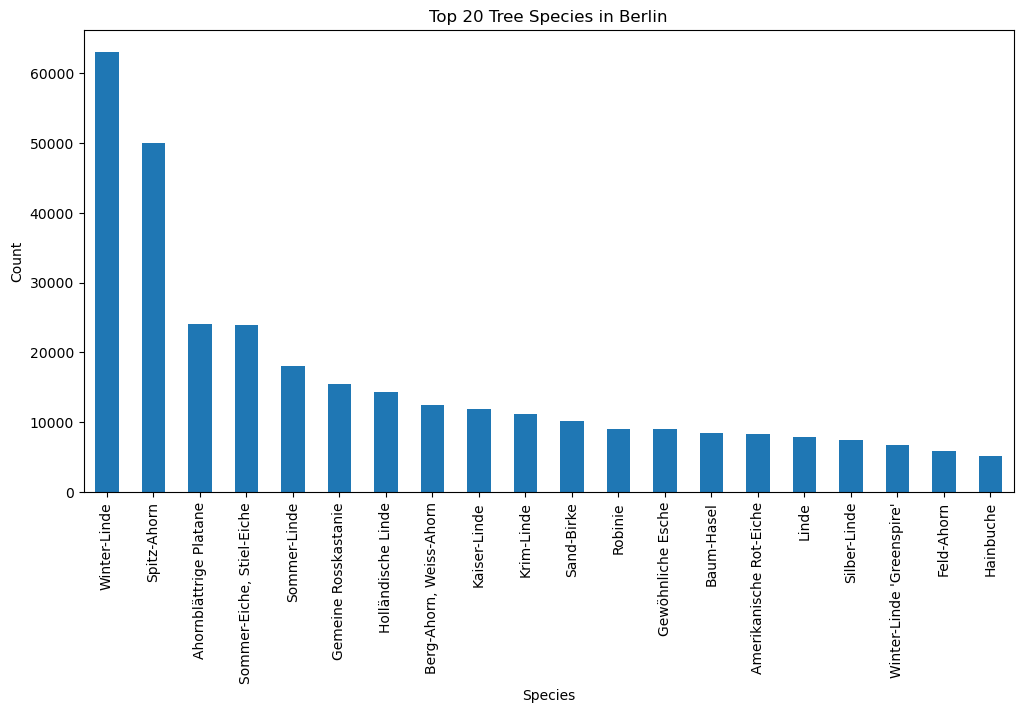

In [14]:

# Top 20 tree species distribution
if 'art_dtsch' in gdf.columns:
    species_counts = gdf['art_dtsch'].value_counts().head(20)
    species_counts.plot(kind='bar', figsize=(12,6))
    plt.title('Top 20 Tree Species in Berlin')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.show()
else:
    print('Column "art_dtsch" not found.')


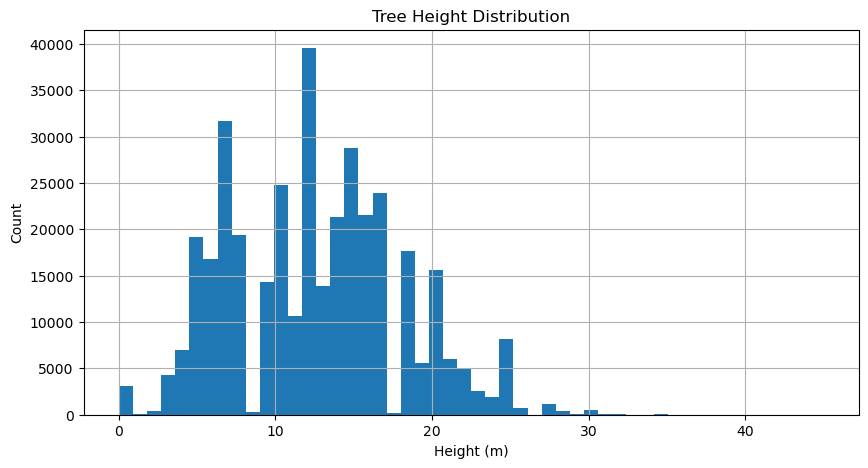

In [ ]:

# Tree height distribution
if 'baumhoehe' in gdf.columns:
    plt.figure(figsize=(10,5))
    gdf['baumhoehe'].hist(bins=50)
    plt.title('Tree Height Distribution')
    plt.xlabel('Height (m)')
    plt.ylabel('Count')
    plt.show()


## Geographic Distribution (Scatter Plot)
Note: This uses lon/lat columns, typically named *'spatial_longitude'* and *'spatial_latitude'*, but adjust based on your dataset.

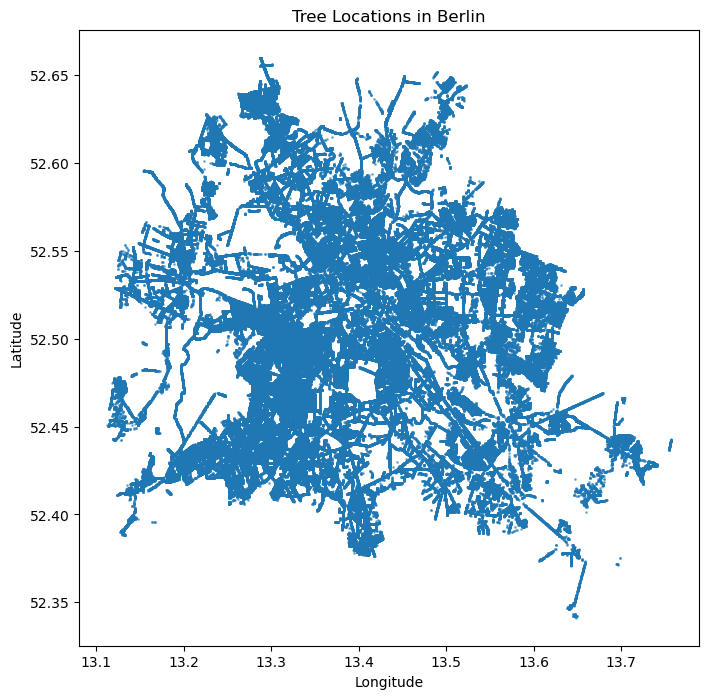

                      art_dtsch                   geometry
142073  Amerikanische Rot-Eiche  POINT (13.30284 52.56885)
391243             Winter-Linde  POINT (13.20312 52.52246)
118989     Gemeine Rosskastanie  POINT (13.31878 52.62483)
235092              Spitz-Ahorn  POINT (13.47082 52.49524)
181233                Hainbuche  POINT (13.39347 52.38763)


In [17]:

# Geographic scatter plot of trees
plt.figure(figsize=(8,8))
plt.scatter(gdf.geometry.x, gdf.geometry.y, s=1, alpha=0.5)
plt.title('Tree Locations in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Optional: sample 5 trees with their species and coordinates
print(gdf[['art_dtsch', 'geometry']].sample(5))
